In [37]:
# import moduels
import h5py
import numpy as np
import matplotlib.pylab as plt
import collections

from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


from PIL import Image
import random
import math

import os


In [38]:
# access the data
# this part have to be replaced when the images from the neuronal networks are available
dset = h5py.File("dataset_test.h5","r")

#Access to the input data
RGB = dset["RGB"]
NIR = dset["NIR"]

#Access groundtruth data
GT = dset["GT"]
CLD = dset["CLD"]

print("The shape of the images is:")
print(RGB.shape)


# get size and numbers of the dataset
# number of images
n_images = RGB.shape[0]

# imagesize x_direction
sx_image = RGB.shape[1]
#imageszize y_direction
sy_image = RGB.shape[2]

The shape of the images is:
(3, 10980, 10980, 3)


In [47]:
# function to create groundtruth

def groundtruth_generator(img_number, x_ind, y_ind,win_x,win_y):
    #create temp image
    cout_out = GT[img_number, x_ind:x_ind+win_x,y_ind:y_ind+win_y]
    temp_img = np.where(cout_out==99,3,cout_out)

    #insert the clouds into the temp groundtruth
    temp_cloud = CLD[img_number, x_ind:x_ind+win_x,y_ind:y_ind+win_y]
    
    #cloud_positions = np.where(CLD[img_number] > 10) # check if this number makes sense
    cloud_positions = np.where(temp_cloud > 10) # check if this number makes sense
    temp_img[cloud_positions] = 2
    
    #cout_out = temp_img[x_ind:x_ind+win_x,y_ind:y_ind+win_y]

    final_ground = temp_img.reshape(win_x*win_y,1)
    return final_ground

final_ground = groundtruth_generator(1, 1, 1,25,25)

# count ground truth
#occurence = []
#occurence = collections.Counter(final_ground)
#print(occurence)

In [4]:
#Access the data from the neuronal network part
# path where the files of the networkpart are 
path = 'C:/Users/Pascal/Documents/ETH/Master/HS2021/Image Interpretation/Lab1/brauchbarer_code/output_network_model_2/'
files = os.listdir(path)
#count how many files there are
num_files = len(files)

#seperate the data into training data and validation data
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(np.arange(num_files),np.arange(num_files),test_size=0.3,random_state=0)

In [5]:
# create the X_train etc. arrays
#test = np.load('./output_network/'+str(files[X_train[0]]))
#test.shape

s_patch = 256 # TODO integrate this information into the metadata line
n_cat = 21 # TODO integrate this information into the metadata line

X_train = np.zeros([len(X_train_n)*np.square(s_patch),n_cat])
y_train = np.zeros([len(y_train_n)*np.square(s_patch),1])

X_val = np.zeros([len(X_val_n)*np.square(s_patch),n_cat])
y_val = np.zeros([len(y_val_n)*np.square(s_patch),1])

step_size = np.square(s_patch)

# TODO check if everything is correctly implemented
for i in range(1,len(X_train_n)+1):
    temp = np.load('./output_network_model_2/'+str(files[X_train_n[i-1]]))#last line contains metadata
    X_train[i*step_size-step_size:i*step_size,:] = temp[:-1,:]
    y_train[i*step_size-step_size:i*step_size] = groundtruth_generator(1,temp[-1,0].astype(np.int64),temp[-1,1].astype(np.int64),s_patch,s_patch)
    
    
for i in range(1,len(X_val_n)+1):
    temp = np.load('./output_network_model_2/'+str(files[X_val_n[i-1]]))#last line contains metadata
    X_val[i*step_size-step_size:i*step_size,:] = temp[:-1,:]
    y_val[i*step_size-step_size:i*step_size] = groundtruth_generator(1,temp[-1,0].astype(np.int64),temp[-1,1].astype(np.int64),s_patch,s_patch)
    
    

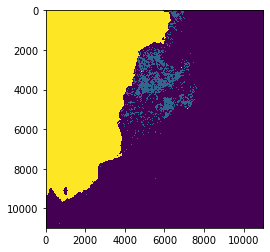

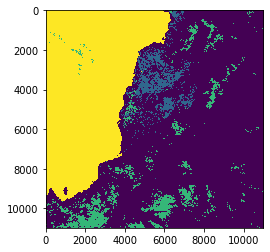

NameError: name 'input_image' is not defined

In [49]:
# Torbens Code

GT = dset["GT"]
#The array GT contains the values 0 = background, 1 = palm oil and 99 = no data.

#Let's visualize this array.
#Note that 99 is assigned to 3 for visualization only.
#-> 99 (3) means that there is no data.
first_gt_image = np.where(GT[0]==99,3,GT[0])
plt.imshow(first_gt_image)
plt.show()

#You can see that palm oil trees are also assigned to the parts that are occluded by clouds.
#Therefore, wherever there is a cloud, we assign the label 2.
CLD = dset["CLD"]
cloud_positions = np.where(CLD[0] > 10)
first_gt_image[cloud_positions] = 2
# lets now print the complete label image
plt.imshow(first_gt_image)
plt.show()

#The label image and the input image still do not match perfectly.
#There are parts in the input image that do not contain data.
#We remove them from the input:
idx = np.where(np.max(input_image[0], axis=-1) == 0)
first_gt_image[idx] = 3
plt.imshow(first_gt_image)
plt.show()

In [ ]:
# Take random Parts of a Picture with a lot of oil trees 
occurence = []

for i in range(n_images):
    occurence[i] = collection.Counter(einzelnes klasiffiziertes bild)
    


# Classifier part

In [6]:
# Decision Tree
# train classifier and validate the classifier
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_val, y_val)

0.7596506754557292

Classifier testing

In [7]:
# confusion matrix --> test set have to be created

# test classifier and create confusion matrix
#y_pred = dt_clf.predict(X_test)
#conf_matrix = confusion_matrix(y_test, y_pred)
#print(conf_matrix)

Auswertung der ganzen Pipeline: z.B. Recall, Precision, etc. --> muss noch implementiert werden --> weitere Möglichkeiten 
suchen

# Visualization
TODO implement